In [36]:
import pandas as pd
pd.__version__

'1.5.2'

**第一步：基础设施REITs基金**

In [37]:
reits_id = {'180101':'招商蛇口产园REIT',
            '180102':'华夏合肥高新REIT',
            '180103':'华夏和达高科REIT',
            '180201':'平安广州广河REIT',
            '180202':'华夏越秀高速REIT',
            '180301':'红土创新盐田港REIT',
            '180401':'鹏华深圳能源REIT',
            '180501':'红土创新深圳安居REIT',
            '180801':'中航首钢绿能REIT',
            '508000':'华安张江光大REIT',
            '508001':'浙江沪杭甬REIT',
            '508006':'富国首创水务REIT',
            '508008':'国金中国铁建REIT',
            '508009':'中金安徽交控REIT',
            '508018':'华夏中国交建REIT',
            '508021':'国君临港产园REIT',
            '508027':'东吴苏园产业REIT',
            '508056':'中金普洛斯REIT',
            '508058':'中金厦门安居REIT',
            '508066':'华泰江苏交控REIT',
            '508068':'华夏北京保障房REIT',
            '508077':'华夏华润有巢REIT',
            '508088':'国君东久新经济REIT',
            '508099':'建信中关村REIT',
            '508098':'嘉实京东仓储REIT'}
type(reits_id)

dict

In [38]:
reits_id.__len__()

25

In [39]:
benchmark_id = {'399300':'沪深300指数',
                '000852':'中证1000指数',
                'H11001':'中证全债指数',
                'H11006':'中证国债指数',
                '932006':'中证REITs全收益指数'}
type(benchmark_id)

dict

In [40]:
benchmark_id.__len__()

5

**第二步：导入基础设施公募REITs及业绩比较基准的历史行情数据**

（1）导入基础设施公募日儿童历史行情数据

In [41]:
reits_value = dict()
i = 0
for k in reits_id.keys():
    reits_value[k] = pd.read_excel('data/基础设施公募REITs历史行情数据-数据导入表（勿动）.xlsx',
                                   sheet_name= i,
                                   header=2,
                                   index_col='日期')
    i = i + 1

reits_value.keys()

dict_keys(['180101', '180102', '180103', '180201', '180202', '180301', '180401', '180501', '180801', '508000', '508001', '508006', '508008', '508009', '508018', '508021', '508027', '508056', '508058', '508066', '508068', '508077', '508088', '508099', '508098'])

In [42]:
reits_value.__len__()

25

（2）导入业绩比较基准数据

In [43]:
benchmark_value = dict()
i = 0
for k in benchmark_id.keys():
    benchmark_value[k] = pd.read_excel('data/业绩比较基准数据.xlsx',
                                   sheet_name= i,
                                   header=2,
                                   index_col='日期')
    i = i + 1

benchmark_value.keys()

dict_keys(['399300', '000852', 'H11001', 'H11006', '932006'])

In [44]:
benchmark_value.__len__()

5

**第三步：绘制基础设施公募REITs历史行情图**

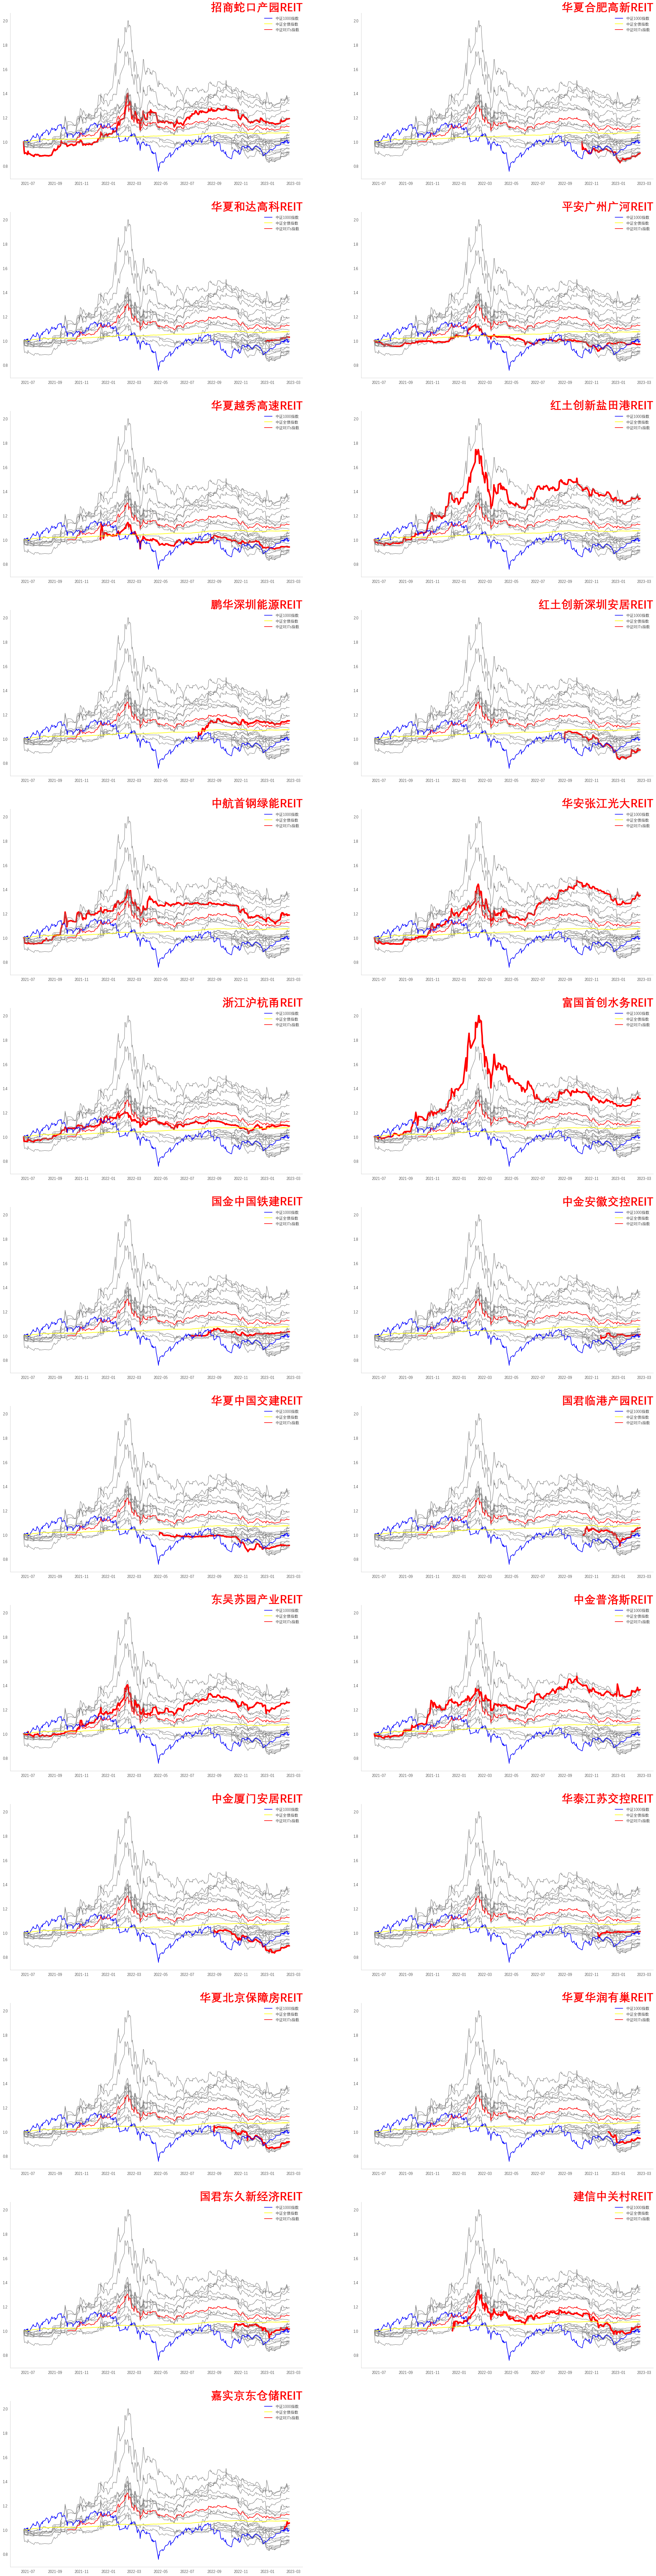

In [45]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['font.family'] = 'Dengxian'
plt.rcParams['axes.unicode_minus'] = False

COLORS = ['red','gray']
LINES = [4,1]

fig, axs = plt.subplots(13,2, figsize=(30,120))
for i, v in zip(range(25),reits_id.keys()):
    r = int(i/2)
    c = int(i % 2)
    for k in reits_value.keys():
        if k == v:
            col = COLORS[0]
            l = LINES[0]
        else:
            col = COLORS[1]
            l = LINES[1]

        x = reits_value[k].index
        y = reits_value[k]['收盘价']/reits_value[k]['收盘价'][0]
        axs[r,c].plot(x,y,color=col,linewidth=l)

    # 添加业绩比较基准
    # '399300':'沪深300指数',
    # '000852':'中证1000指数',
    # 'H11001':'中证全债指数',
    # 'H11006':'中证国债指数',
    # '932006':'中证REITs全收益指数'

    # 添加中证1000指数,
    symbol = '000852'
    col = 'blue'
    label = '中证1000指数'
    x_benchmark = benchmark_value[symbol].index
    y_benchmark = benchmark_value[symbol]['收盘价']/benchmark_value[symbol]['收盘价'][0]
    axs[r,c].plot(x_benchmark,y_benchmark,color=col,label=label)

    # 添加中证全债指数
    symbol = 'H11001'
    col = 'yellow'
    label = '中证全债指数'
    x_benchmark = benchmark_value[symbol].index
    y_benchmark = benchmark_value[symbol]['收盘价']/benchmark_value[symbol]['收盘价'][0]
    axs[r,c].plot(x_benchmark,y_benchmark,color=col,label=label)

    # 添加中证REITs全收益指数
    symbol = '932006'
    col = 'red'
    label = '中证REITs指数'
    x_benchmark = benchmark_value[symbol].index
    y_benchmark = benchmark_value[symbol]['收盘价']/benchmark_value[symbol]['收盘价'][0]
    axs[r,c].plot(x_benchmark,y_benchmark,color=col,label=label)

    axs[r,c].set_title(reits_id[v],loc='right',fontdict={'fontsize':30,'fontweight':'bold','color':'red'})
    axs[r,c].grid(False)
    axs[r,c].legend(loc='best',edgecolor='white',ncols=1)
    axs[r,c].spines['top'].set_color('None')
    axs[r,c].spines['right'].set_color('None')

axs[12,1].set_axis_off()

**第四步：构建REITs基金累计净值数据集**

In [46]:
rdata = pd.DataFrame()
rdata1 = pd.DataFrame()
rdata2 = pd.DataFrame()

In [47]:
for k in benchmark_value.keys():
    rdata1 = pd.concat([rdata1,benchmark_value[k]['收盘价']],axis=1)
rdata1.columns = list(benchmark_id.values())

rdata1

沪深300指数   中证1000指数    中证全债指数    中证国债指数  中证REITs全收益指数
2021-06-21  5090.3854  6968.2963  210.2690  197.9435           NaN
2021-06-22  5122.1583  7000.2518  210.3028  198.0564           NaN
2021-06-23  5147.3938  7046.1745  210.3815  198.1941           NaN
2021-06-24  5155.9738  6974.6420  210.4756  198.2761           NaN
2021-06-25  5239.9684  7000.4297  210.5398  198.2889           NaN
...               ...        ...       ...       ...           ...
2023-02-14  4145.2902  7061.4490  226.0159  212.8090     1132.1885
2023-02-15  4123.6893  7063.6048  226.0667  212.8553     1128.9936
2023-02-16  4093.4876  6925.2034  226.1156  212.9432     1126.1707
2023-02-17  4034.5070  6868.5477  226.1277  212.9046     1125.0464
2023-02-20        NaN        NaN       NaN       NaN     1126.7890

[418 rows x 5 columns]

In [48]:
for k in reits_value.keys():
    rdata2 = pd.concat([rdata2,reits_value[k]['收盘价']], axis=1)
rdata2.columns = list(reits_id.values())

rdata2

招商蛇口产园REIT  华夏合肥高新REIT  华夏和达高科REIT  平安广州广河REIT  华夏越秀高速REIT  \
2021-06-21    2.650000         NaN         NaN   13.108000         NaN   
2021-06-22    2.464000         NaN         NaN   13.050000         NaN   
2021-06-23    2.393000         NaN         NaN   13.026000         NaN   
2021-06-24    2.400000         NaN         NaN   12.963000         NaN   
2021-06-25    2.407000         NaN         NaN   13.045000         NaN   
...                ...         ...         ...         ...         ...   
2023-02-14    3.159197       2.542       3.164   12.705077    8.234377   
2023-02-15    3.145692       2.548       3.156   12.734416    8.221806   
2023-02-16    3.144653       2.561       3.154   12.723550    8.206091   
2023-02-17    3.150886       2.566       3.156   12.722463    8.206091   
2023-02-20    3.156081       2.583       3.151   12.713770    8.198758   

            红土创新盐田港REIT  鹏华深圳能源REIT  红土创新深圳安居REIT  中航首钢绿能REIT  华安张江光大REIT  \
2021-06-21     2.367000         NaN           NaN   14.711000    3.166000   
2021-06-22     2.335000         NaN           NaN   14.700000    3.121000   
2021-06-23     2.308000         NaN           NaN   14.288000    3.059000   
2021-06-24     2.323000         NaN           NaN   14.070000    3.062000   
2021-06-25     2.324000         NaN           NaN   14.078000    3.051000   
...                 ...         ...           ...         ...         ...   
2023-02-14     3.220206       8.196         2.956   17.606442    4.357479   
2023-02-15     3.202920       8.229         2.970   17.448908    4.321262   
2023-02-16     3.186651       8.236         2.926   17.419441    4.265384   
2023-02-17     3.156147       8.220         2.933   17.493108    4.257105   
2023-02-20     3.172416       8.231         2.931   17.473841    4.275731   

            ...  国君临港产园REIT  东吴苏园产业REIT  中金普洛斯REIT  中金厦门安居REIT  华泰江苏交控REIT  \
2021-06-21  ...         NaN    3.907000   3.972000         NaN         NaN   
2021-06-22  ...         NaN    3.907000   3.894000         NaN         NaN   
2021-06-23  ...         NaN    3.906000   3.911000         NaN         NaN   
2021-06-24  ...         NaN    3.885000   3.901000         NaN         NaN   
2021-06-25  ...         NaN    3.887000   3.909000         NaN         NaN   
...         ...         ...         ...        ...         ...         ...   
2023-02-14  ...       5.657    4.937765   5.495037       3.013       7.702   
2023-02-15  ...       5.631    4.916301   5.438966       3.010       7.694   
2023-02-16  ...       5.641    4.915279   5.408853       3.009       7.702   
2023-02-17  ...       5.646    4.911191   5.397431       3.020       7.721   
2023-02-20  ...       5.668    4.914257   5.422352       3.017       7.727   

            华夏北京保障房REIT  华夏华润有巢REIT  国君东久新经济REIT  建信中关村REIT  嘉实京东仓储REIT  
2021-06-21          NaN         NaN          NaN        NaN         NaN  
2021-06-22          NaN         NaN          NaN        NaN         NaN  
2021-06-23          NaN         NaN          NaN        NaN         NaN  
2021-06-24          NaN         NaN          NaN        NaN         NaN  
2021-06-25          NaN         NaN          NaN        NaN         NaN  
...                 ...         ...          ...        ...         ...  
2023-02-14        2.992       2.688        3.971   4.316970       4.104  
2023-02-15        2.991       2.685        3.962   4.281585       4.184  
2023-02-16        2.972       2.680        3.934   4.285629       4.151  
2023-02-17        2.995       2.675        3.911   4.290684       4.118  
2023-02-20        2.995       2.671        3.919   4.310904       4.144  

[405 rows x 25 columns]

In [55]:
rdata = rdata1.merge(rdata2,left_index=True,right_index=True)

rdata

沪深300指数   中证1000指数    中证全债指数    中证国债指数  中证REITs全收益指数  \
2021-06-21  5090.3854  6968.2963  210.2690  197.9435           NaN   
2021-06-22  5122.1583  7000.2518  210.3028  198.0564           NaN   
2021-06-23  5147.3938  7046.1745  210.3815  198.1941           NaN   
2021-06-24  5155.9738  6974.6420  210.4756  198.2761           NaN   
2021-06-25  5239.9684  7000.4297  210.5398  198.2889           NaN   
...               ...        ...       ...       ...           ...   
2023-02-16  4093.4876  6925.2034  226.1156  212.9432     1126.1707   
2023-02-17  4034.5070  6868.5477  226.1277  212.9046     1125.0464   
2023-02-17  4034.5070  6868.5477  226.1277  212.9046     1125.0464   
2023-02-20  4133.4896  6959.3609  226.0135  212.7346     1126.7890   
2023-02-20        NaN        NaN       NaN       NaN     1126.7890   

            招商蛇口产园REIT  华夏合肥高新REIT  华夏和达高科REIT  平安广州广河REIT  华夏越秀高速REIT  ...  \
2021-06-21    2.650000         NaN         NaN   13.108000         NaN  ...   
2021-06-22    2.464000         NaN         NaN   13.050000         NaN  ...   
2021-06-23    2.393000         NaN         NaN   13.026000         NaN  ...   
2021-06-24    2.400000         NaN         NaN   12.963000         NaN  ...   
2021-06-25    2.407000         NaN         NaN   13.045000         NaN  ...   
...                ...         ...         ...         ...         ...  ...   
2023-02-16    3.144653       2.561       3.154   12.723550    8.206091  ...   
2023-02-17    3.150886       2.566       3.156   12.722463    8.206091  ...   
2023-02-17    3.150886       2.566       3.156   12.722463    8.206091  ...   
2023-02-20    3.156081       2.583       3.151   12.713770    8.198758  ...   
2023-02-20    3.156081       2.583       3.151   12.713770    8.198758  ...   

            国君临港产园REIT  东吴苏园产业REIT  中金普洛斯REIT  中金厦门安居REIT  华泰江苏交控REIT  \
2021-06-21         NaN    3.907000   3.972000         NaN         NaN   
2021-06-22         NaN    3.907000   3.894000         NaN         NaN   
2021-06-23         NaN    3.906000   3.911000         NaN         NaN   
2021-06-24         NaN    3.885000   3.901000         NaN         NaN   
2021-06-25         NaN    3.887000   3.909000         NaN         NaN   
...                ...         ...        ...         ...         ...   
2023-02-16       5.641    4.915279   5.408853       3.009       7.702   
2023-02-17       5.646    4.911191   5.397431       3.020       7.721   
2023-02-17       5.646    4.911191   5.397431       3.020       7.721   
2023-02-20       5.668    4.914257   5.422352       3.017       7.727   
2023-02-20       5.668    4.914257   5.422352       3.017       7.727   

            华夏北京保障房REIT  华夏华润有巢REIT  国君东久新经济REIT  建信中关村REIT  嘉实京东仓储REIT  
2021-06-21          NaN         NaN          NaN        NaN         NaN  
2021-06-22          NaN         NaN          NaN        NaN         NaN  
2021-06-23          NaN         NaN          NaN        NaN         NaN  
2021-06-24          NaN         NaN          NaN        NaN         NaN  
2021-06-25          NaN         NaN          NaN        NaN         NaN  
...                 ...         ...          ...        ...         ...  
2023-02-16        2.972       2.680        3.934   4.285629       4.151  
2023-02-17        2.995       2.675        3.911   4.290684       4.118  
2023-02-17        2.995       2.675        3.911   4.290684       4.118  
2023-02-20        2.995       2.671        3.919   4.310904       4.144  
2023-02-20        2.995       2.671        3.919   4.310904       4.144  

[418 rows x 30 columns]

**第五步：相关性**

In [56]:
import riskfolio as rp
rp.__version__

'3.3.0'

C:\Users\ThinkPad\.conda\envs\qtconda\lib\site-packages\riskfolio\PlotFunctions.py:2256: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


<Axes: title={'center': 'Assets Clustermap'}>

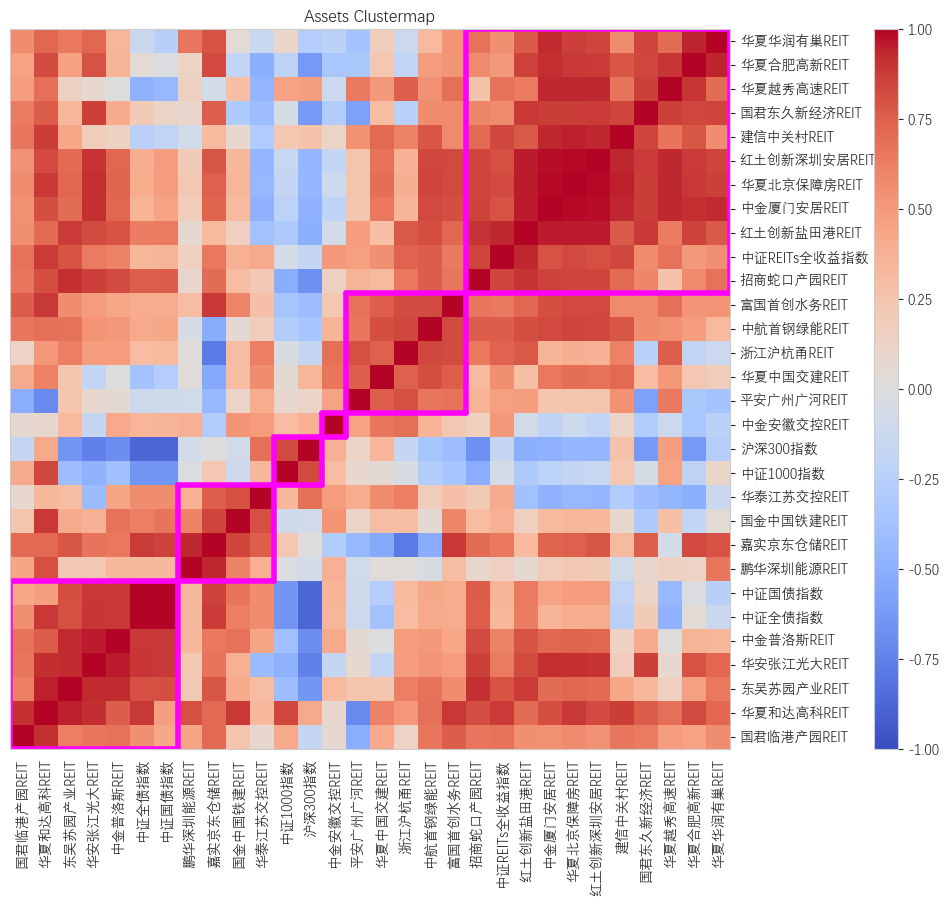

In [57]:
rp.plot_clusters(returns=rdata,
                 codependence='spearman',
                 linkage='ward',
                 k=None,
                 max_k=10,
                 leaf_order=True,
                 dendrogram=False,
                 cmap='coolwarm',
                 title='Assets Clustermap',
                 ax=None)

**第六步：相关性计算**

In [ ]:
# data = pd.DataFrame()
#
# for k in reits_value.keys():
#     data = pd.concat([data,reits_value[k]['收盘价']], axis=1)
#
# data.columns = list(reits_id.values())

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Dengxian'
plt.rcParams['axes.unicode_minus'] = False

# Calculate the correlation matrix
corr = rdata.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(18,15))
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt=".2f")

# Show the plot
plt.show()